# Avocado

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 



In [1]:
#import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings ('ignore')

In [2]:
data = pd.read_csv('avocado.csv')

In [3]:
data.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
5,5.0,22-11-2015,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015.0,Albany
6,6.0,15-11-2015,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015.0,Albany
7,7.0,08-11-2015,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015.0,Albany
8,8.0,01-11-2015,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015.0,Albany
9,9.0,25-10-2015,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015.0,Albany


Average price is the target. Target is continuous in nature, so I will be using regression. I've noticed a column called 'unnamed' which doesn't help with predictions. 

In [4]:
data.shape

(16468, 14)

In [5]:
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
#Removing 'unnamed' feature  
data=data.drop(['Unnamed: 0'], axis=1)

In [7]:
data.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

Mixture of object and float64. Date is object instead of date type, which can be changed. Other object columns appear to be categorical - Could encode these.

In [8]:
#Change date from object to date
df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)
df['Date'] = pd.to_datetime(df['Date'])
print("\nDataFrame after conversion:")
print(df)


Original DataFrame:
             Date  AveragePrice  Total Volume     4046       4225    4770  \
0      27-12-2015          1.33      64236.62  1036.74   54454.85   48.16   
1      20-12-2015          1.35      54876.98   674.28   44638.81   58.33   
2      13-12-2015          0.93     118220.22   794.70  109149.67  130.50   
3      06-12-2015          1.08      78992.15  1132.00   71976.41   72.58   
4      29-11-2015          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
16463         NaN           NaN           NaN      NaN        NaN     NaN   
16464         NaN           NaN           NaN      NaN        NaN     NaN   
16465         NaN           NaN           NaN      NaN        NaN     NaN   
16466         NaN           NaN           NaN      NaN        NaN     NaN   
16467         NaN           NaN           NaN      NaN        NaN     NaN   

       Total Bags  Small Bags  Large Bags  XLarge Bags 

In [9]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                   float64
region                  object
dtype: object

Date is now datetime format

Can now remove 'year'as we have converted date into datetime

In [10]:
df.isnull()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,True,True,True,True,True,True,True,True,True,True,True,True,True
16464,True,True,True,True,True,True,True,True,True,True,True,True,True
16465,True,True,True,True,True,True,True,True,True,True,True,True,True
16466,True,True,True,True,True,True,True,True,True,True,True,True,True


In [11]:
df.isnull().sum()

Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [12]:
df.shape

(16468, 13)

Significant amount of null values

In [13]:
df2=df.dropna()

In [14]:
df2.shape

(1517, 13)

Dropped rows with null values, as there were so many and would have warped data to impute with mean or mode

In [15]:
#checking the unique values
df2.nunique()

Date             104
AveragePrice     113
Total Volume    1517
4046            1517
4225            1517
4770            1516
Total Bags      1517
Small Bags      1517
Large Bags      1377
XLarge Bags      711
type               1
year               2
region            51
dtype: int64

Lots of unique values. Type only has 1 value, so will drop this column also. 

In [16]:
df2.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [17]:
df2=df2.drop(['type'], axis=1)

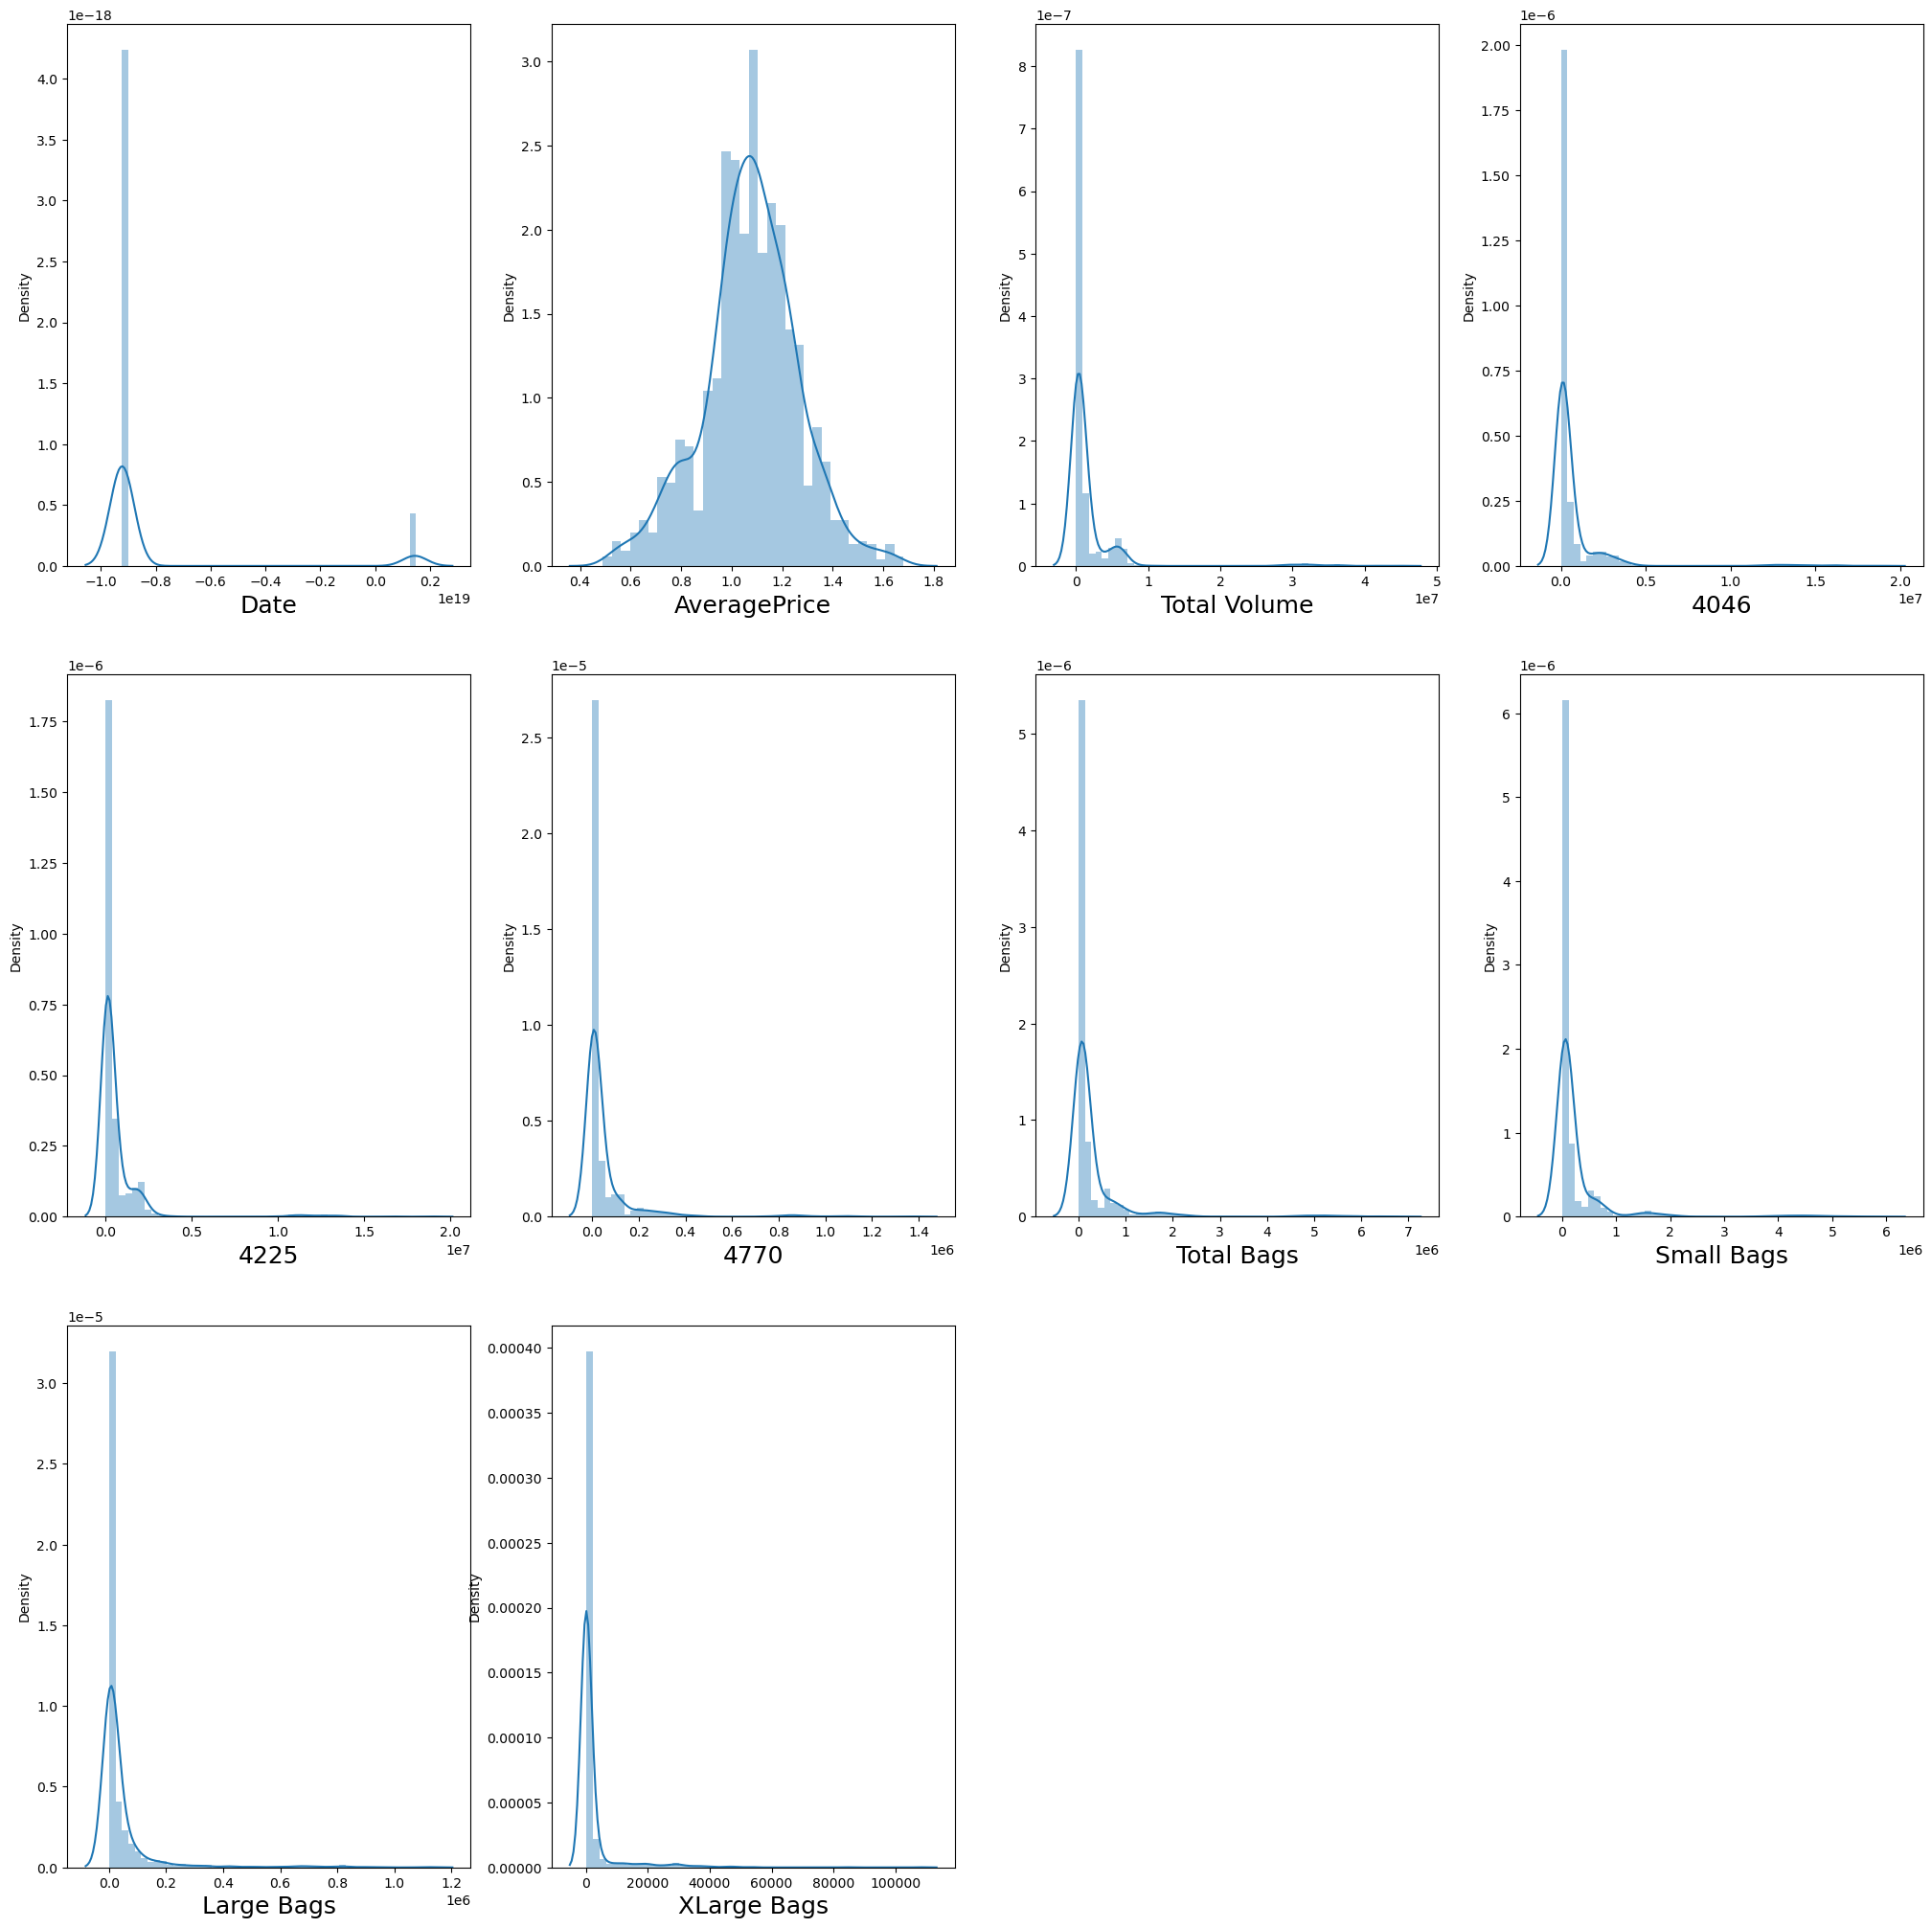

In [18]:
#Check the distribution in the numerical columns 
columns = ['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

plotnumber = 1
plt.figure(figsize=(25,25))
for column in columns:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=18)
        plotnumber += 1

plt.show()

Data is heavily skewed to the left

In [33]:
#Confirming skewness
df2.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
dtype: float64

Text(0.5, 1.0, 'Average Price of Avocado According to Date')

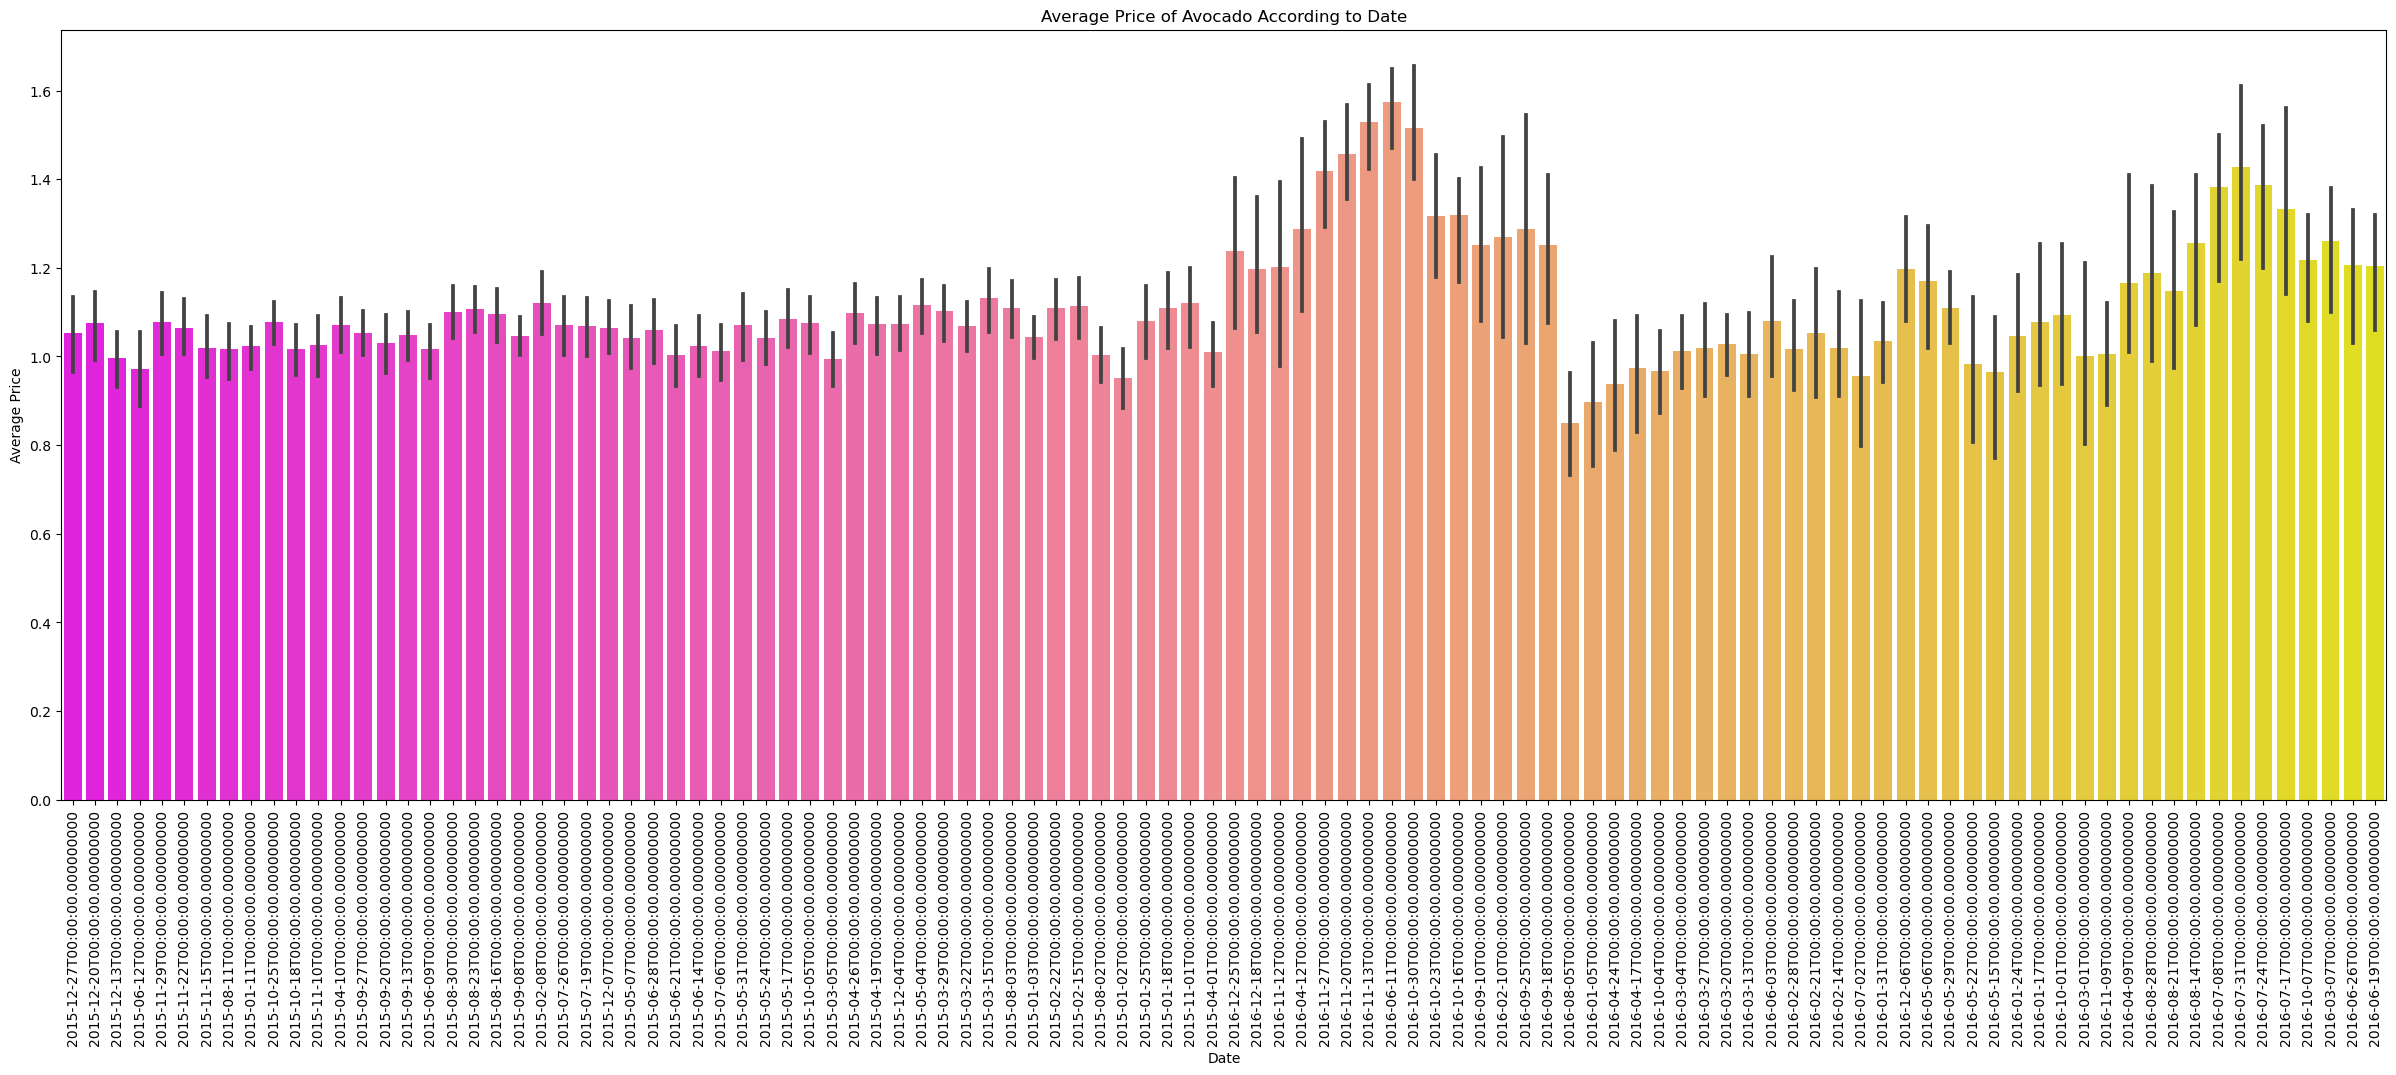

In [32]:
plt.figure(figsize=(30,10))
sns.barplot(x='Date',y='AveragePrice',data=df2,palette='spring')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Date')

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

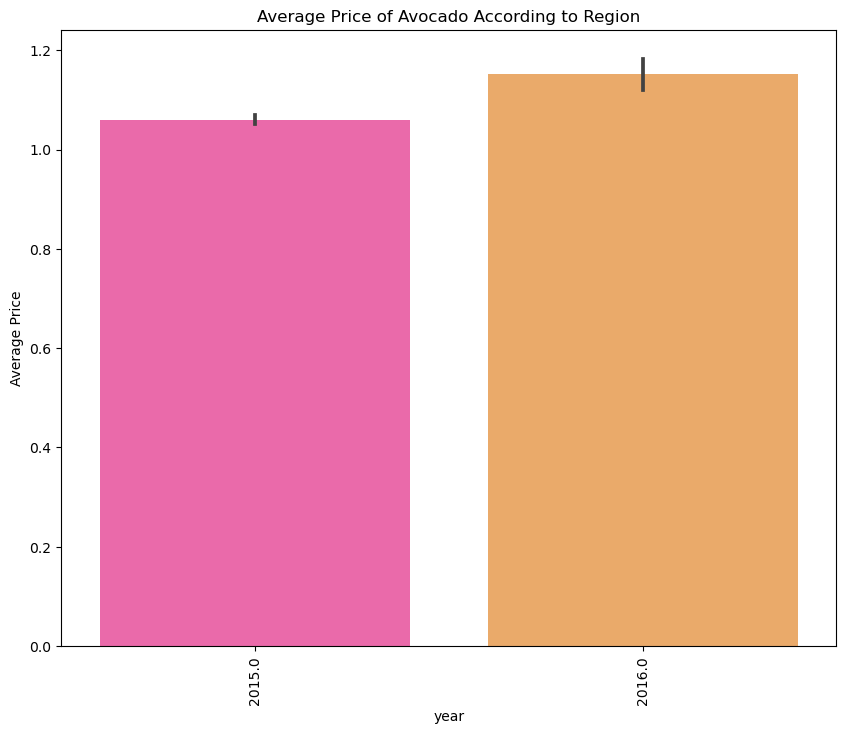

In [31]:
plt.figure(figsize=(10,8))
sns.barplot(x='year',y='AveragePrice',data=df2,palette='spring')
plt.xticks(rotation=90)
plt.xlabel('year')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

Two spikes in data for average price - both in 2016

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

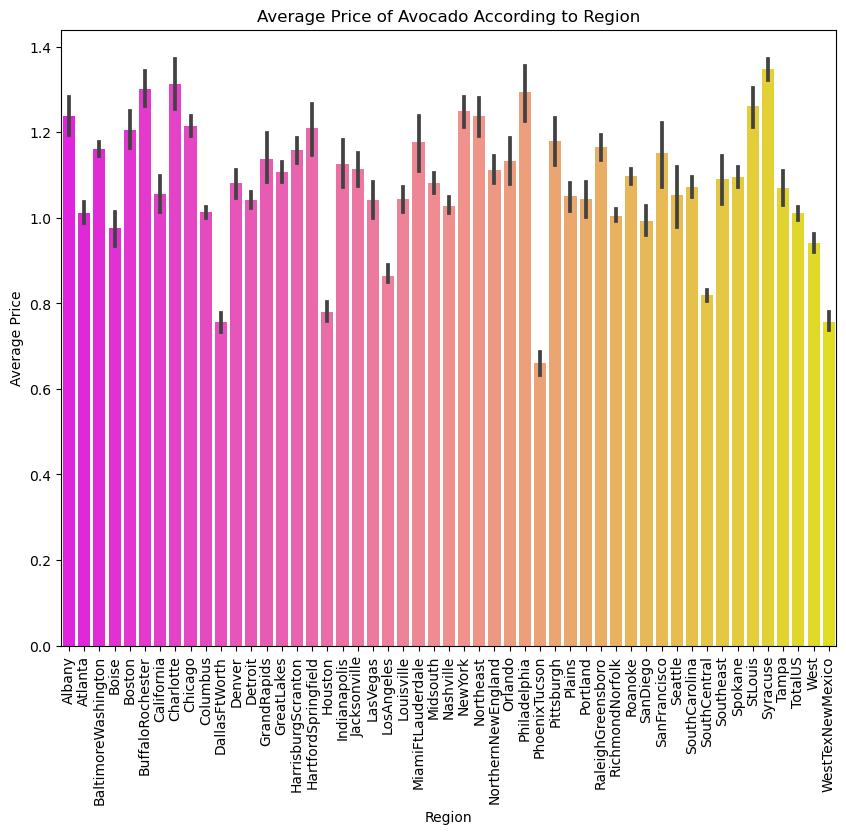

In [30]:
plt.figure(figsize=(10,8))
sns.barplot(x='region',y='AveragePrice',data=df2,palette='spring')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

We can see that Pittsburgh, WestTexNewMexico and DallasFtWorth have low average prices compared to Syracuse, Philadelphia and Charlotte with high average prices.

Text(0.5, 1.0, 'Total Volume of Avocado in the region')

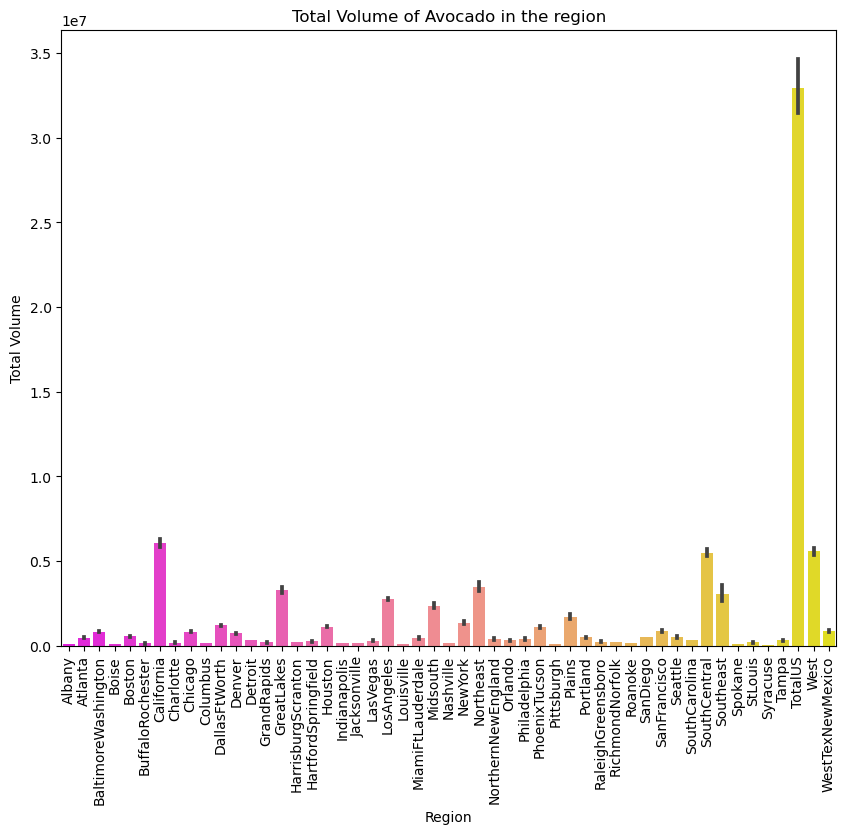

In [29]:
plt.figure(figsize=(10,8))
sns.barplot(x='region',y='Total Volume',data=df2,palette='spring')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Total Volume')
plt.title('Total Volume of Avocado in the region')

TotalUS has significantly higher consumption of avocados compared to the other regions

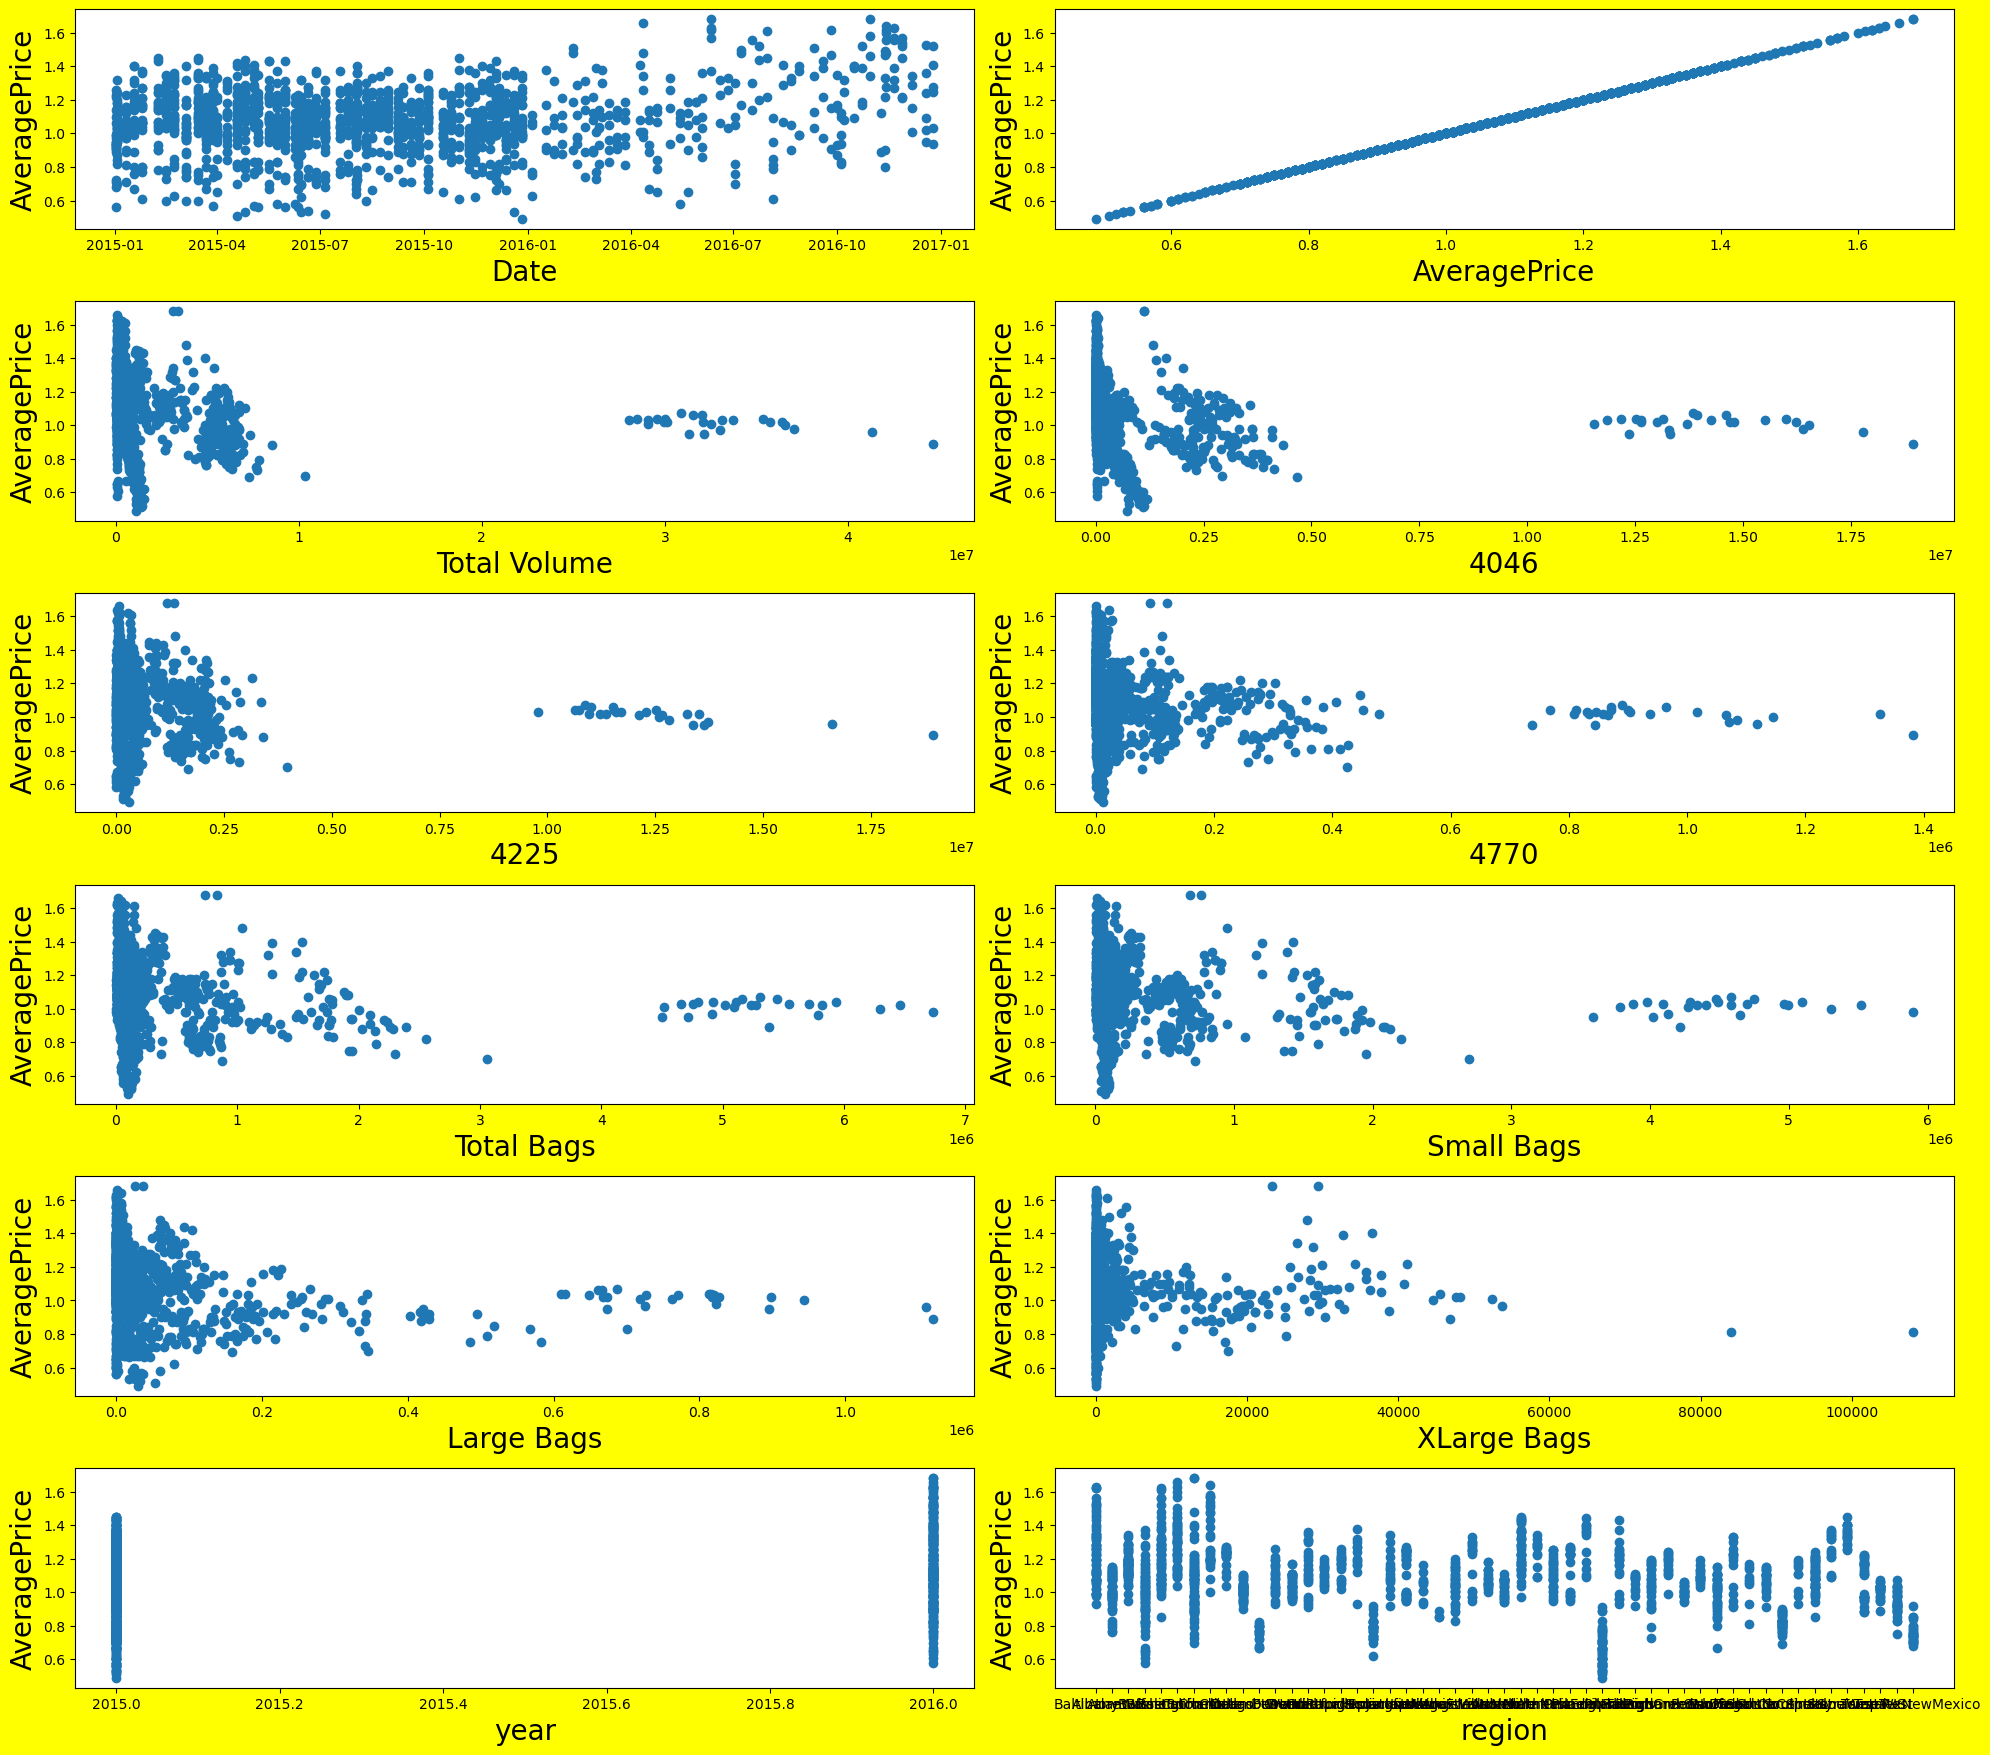

In [34]:
#Exploring relationship between features and target
plt.figure(figsize=(20,20), facecolor='yellow')
plotnumber=1
for column in df2:
    if plotnumber <=14:
        ax=plt.subplot(7,2,plotnumber)
        plt.scatter (x=df2[column], y=df2['AveragePrice'])
        plt.xlabel(column, fontsize=20)
        plt.ylabel ('AveragePrice', fontsize=20)
        plotnumber +=1
        plt.tight_layout()

No linear relationships

AveragePrice       AxesSubplot(0.125,0.747241;0.168478x0.132759)
Total Volume    AxesSubplot(0.327174,0.747241;0.168478x0.132759)
4046            AxesSubplot(0.529348,0.747241;0.168478x0.132759)
4225            AxesSubplot(0.731522,0.747241;0.168478x0.132759)
4770               AxesSubplot(0.125,0.587931;0.168478x0.132759)
Total Bags      AxesSubplot(0.327174,0.587931;0.168478x0.132759)
Small Bags      AxesSubplot(0.529348,0.587931;0.168478x0.132759)
Large Bags      AxesSubplot(0.731522,0.587931;0.168478x0.132759)
XLarge Bags        AxesSubplot(0.125,0.428621;0.168478x0.132759)
year            AxesSubplot(0.327174,0.428621;0.168478x0.132759)
dtype: object

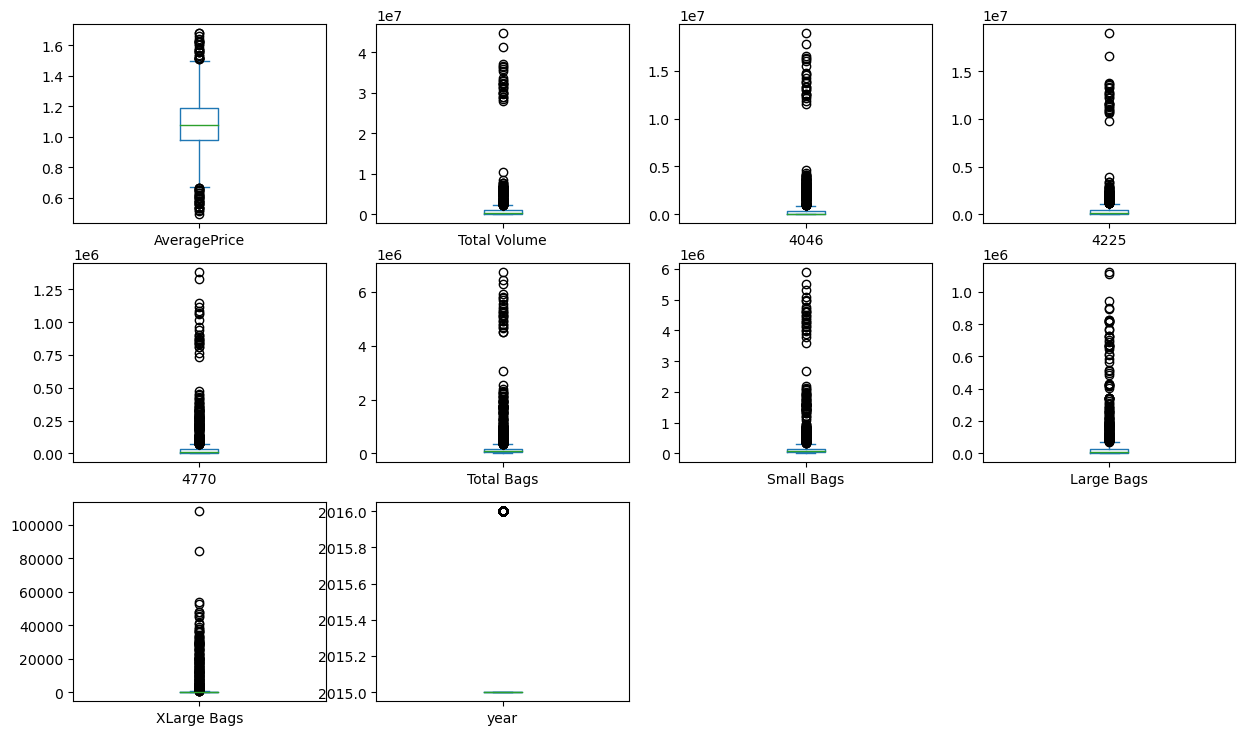

In [49]:
#Exploring outliers
df.plot(kind='box',subplots=True,layout=(5,4),figsize=(15,15))



Significant outliers present that will need to be dealt with

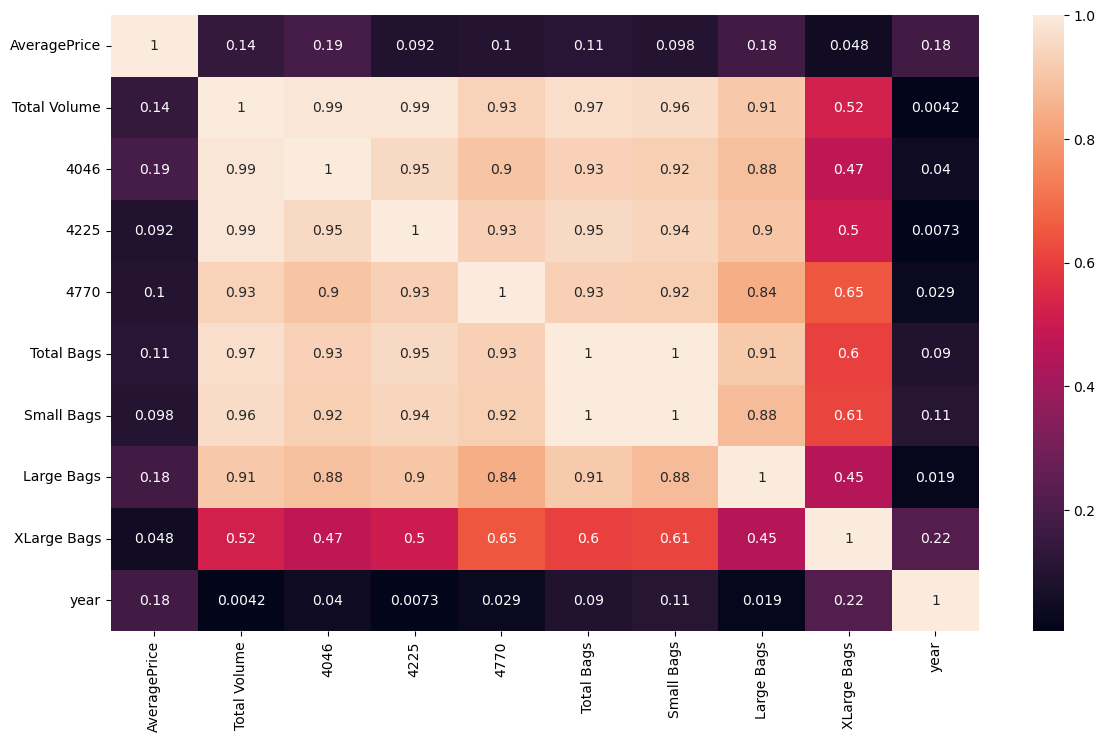

In [50]:
#Explore correlation
df_corr= data.corr().abs()
plt.figure (figsize=(14,8))
sns.heatmap(df_corr, annot=True,)
plt.show()

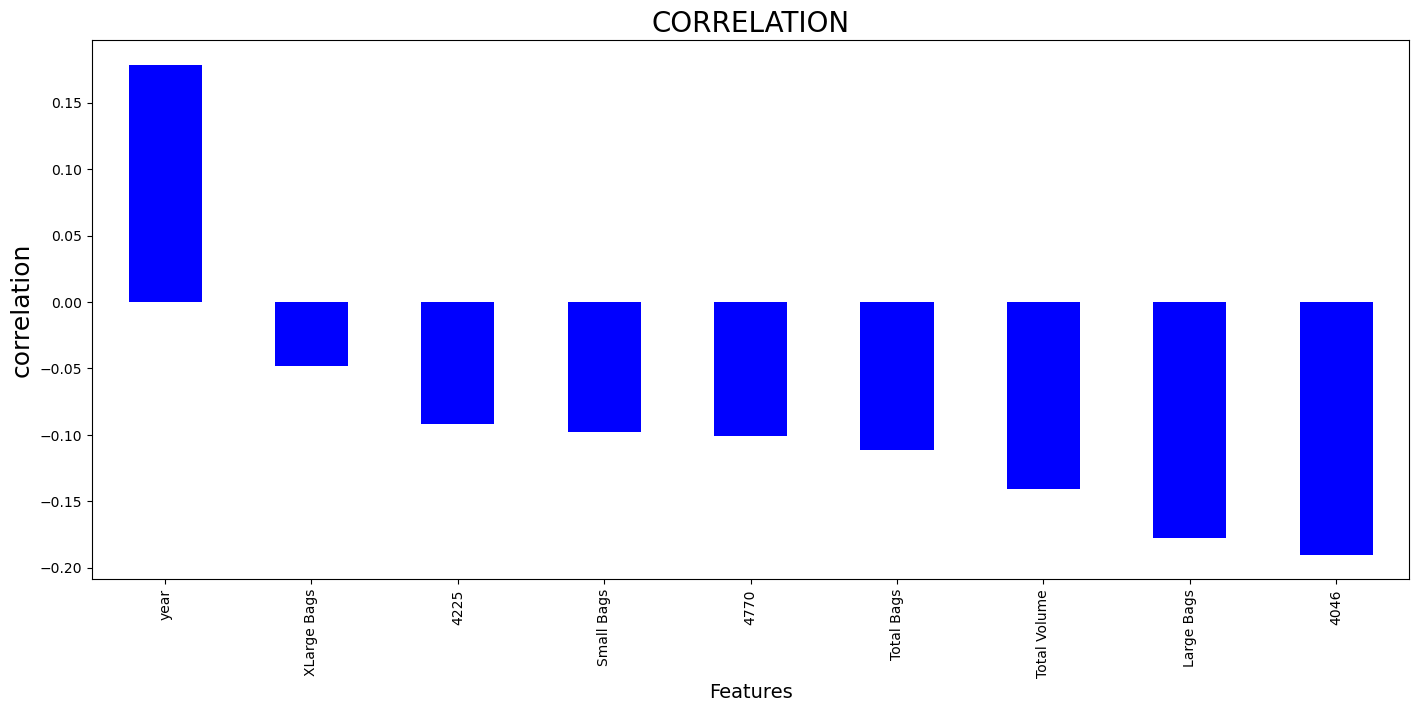

In [52]:
# check positive or negative correlation 
plt.figure(figsize=(17,7))
data.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='b')
plt.xlabel('Features',fontsize=14)
plt.ylabel('correlation',fontsize=18)
plt.title('CORRELATION',fontsize=20)
plt.show()

Many of the features are negatively correlated to the target, but seem significant according to heatmap so will not delete.

In [55]:
df2.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['region'] = le.fit_transform(df2['region'])

In [66]:
# Remove outliers using zscore
from scipy.stats import zscore
columns = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
df2 = pd.DataFrame(df2)
df2[columns] = df2[columns].apply(zscore)
print(df2)


           Date  AveragePrice  Total Volume      4046      4225      4770  \
0    2015-12-27      1.350481     -0.346966 -0.331490 -0.333053 -0.365608   
1    2015-12-20      1.456397     -0.349078 -0.331676 -0.338923 -0.365534   
2    2015-12-13     -0.767838     -0.334785 -0.331614 -0.300348 -0.365010   
3    2015-06-12      0.026531     -0.343636 -0.331441 -0.322576 -0.365431   
4    2015-11-29      1.085691     -0.349944 -0.331539 -0.339401 -0.365408   
...         ...           ...           ...       ...       ...       ...   
1512 2016-10-16      1.668229     -0.318397 -0.302475 -0.331910 -0.238672   
1513 2016-09-10      2.303724     -0.321242 -0.309770 -0.334407 -0.224966   
1514 2016-02-10      2.144850     -0.321203 -0.308209 -0.333987 -0.244443   
1515 2016-09-25      2.091892     -0.318784 -0.304230 -0.333568 -0.238936   
1516 2016-09-18      1.880061     -0.320172 -0.309877 -0.333209 -0.245699   

      Total Bags  Small Bags  Large Bags  XLarge Bags    year  region  
0  

In [67]:
#Removing skewness
from sklearn.preprocessing import PowerTransformer
PT = PowerTransformer(method='yeo-johnson')

In [72]:

df2[["AveragePrice","Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags"]] = PT.fit_transform(df2[["AveragePrice","Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags"]].values)

In [74]:
#Checking skewness after yeo-johnson
df2.skew()

AveragePrice    0.020009
Total Volume    0.224336
4046            0.352900
4225            0.286899
4770            0.310682
Total Bags      0.161951
Small Bags      0.180289
Large Bags      0.371056
XLarge Bags     0.957940
year            1.828332
region          0.288146
dtype: float64

skewness is significantly better

In [89]:
#Seperate into dependent and independent variables
x=df2.drop (columns=['AveragePrice','Date'], axis=1)
y=df2['AveragePrice']

In [90]:
#Scale the numeric data
from sklearn.preprocessing import StandardScaler
numeric_columns = df2.select_dtypes(include=['number']).columns
datetime_columns = df2.select_dtypes(include=['datetime64']).columns
numeric_df = df2[numeric_columns]
datetime_df = df2[datetime_columns]
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(numeric_df)
df2_scaled = pd.concat([pd.DataFrame(numeric_scaled, columns=numeric_columns), datetime_df], axis=1)
print(df2_scaled)


      AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0         1.369857     -1.330249 -1.198322 -0.794907 -1.167336   -1.622893   
1         1.481189     -1.378024 -1.203558 -0.891182 -1.165679   -1.596343   
2        -0.774546     -1.069773 -1.201817 -0.329546 -1.153951   -1.641127   
3         0.007290     -1.256530 -1.196948 -0.633131 -1.163359   -1.719447   
4         1.092778     -1.397842 -1.199697 -0.899217 -1.162838   -1.706813   
...            ...           ...       ...       ...       ...         ...   
1512      1.704647     -0.757343 -0.497075 -0.776637  0.520042   -0.330156   
1513      2.380712     -0.808632 -0.653248 -0.816757  0.605385   -0.258004   
1514      2.210954     -0.807912 -0.618773 -0.809945  0.480550   -0.274165   
1515      2.154473     -0.764245 -0.533522 -0.803189  0.518285   -0.246581   
1516      1.929098     -0.789201 -0.655646 -0.797418  0.471643   -0.156068   

      Small Bags  Large Bags  XLarge Bags      year    region  

In [91]:
#Split data into Xtrain/test and ytrain/test
x_train, x_test, y_train, y_test= train_test_split (x,y, test_size= 0.2, random_state= 3)

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
cv = cross_val_score(lr,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.27243579 0.39225304 0.49138758 0.47096677 0.28890226]
0.3831890883850946


In [93]:
lr.fit(x_train, y_train)
pred_train = lr.predict(x_train)
pred_test = lr.predict(x_test)

r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred_test)

print("R-squared Train:", r2_train)
print("R-squared Test:", r2_test)


R-squared Train: 0.4101980693946714
R-squared Test: 0.2533525257466389


Poor scores. I will try another regressor model.

In [94]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train, y_train)
pred_train = dt.predict(x_train)
pred_test = dt.predict(x_test)

r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred_test)

print("R-squared Train:", r2_train)
print("R-squared Test:", r2_test)

R-squared Train: 1.0
R-squared Test: 0.616563086439323


Better than linear regression, but can still improve with hyper parameter tuning.

In [95]:
dt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [97]:
#Using gridsearch to find best parameters
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_dt_model = grid_search.best_estimator_

y_pred = best_dt_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Mean Squared Error on Test Set: 0.4083587849641582


In [100]:
dt=DecisionTreeRegressor(max_depth=None, min_samples_leaf=2,min_samples_split=5)
dt.fit(x_train,y_train)
dt_score_training = dt.score(x_train,y_train)
pred_dt=dt.predict(x_test)
dt_score_training*100

97.55662629125243

In [101]:
compare={"Actual": y_test, "Predict": y_pred}
pd.DataFrame(compare)

,Actual,Predict
1411,3.235972,2.793269
16,0.167199,-0.619694
1092,0.274484,-0.168429
783,-1.636659,-1.598912
1145,1.760669,1.333287
...,...,...
706,0.007290,0.945855
656,0.436324,0.836092
1286,-1.586462,-0.945157
1394,0.167199,0.463519


In [102]:
import pickle
filename= 'Avocado.pkl'
pickle.dump(lr, open(filename,'wb'))
loaded_model= pickle.load(open('Avocado.pkl', 'rb'))